### NOte - 
Task2 code was adepeted from the following link - https://github.com/NUS-HPC-AI-Lab/PAD

Adepted version of it for MNIST dataset and computation limits can be found in task2 folder

In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from torchvision.utils import save_image
from thop import profile
import sys
from PIL import Image

figures_dir = '../report/figures/'

from utils import TensorDataset



In [38]:
def get_syn_dataset (syn_images, syn_labels):
    img = torch.load(syn_images)
    label = torch.load(syn_labels)
    label.argmax(dim=1)
    # l
    syn_dataset = TensorDataset(img, label)
    
    channel = img.shape[1]
    num_classes = label.max().item() + 1
    im_size = (img.shape[2], img.shape[3])

    dataloader = torch.utils.data.DataLoader(syn_dataset, batch_size=32, shuffle=True)
    return syn_dataset, channel, num_classes, im_size, dataloader

In [17]:
syn_images = "./task2/PAD/distill/logged_files/MNIST/10/ConvNet/RANDOM/Normal/images_best.pt"
syn_labels = "./task2/PAD/distill/logged_files/MNIST/10/ConvNet/RANDOM/Normal/labels_best.pt"

In [22]:
syn_dataset, channel, num_classes, im_size, dataloader = get_syn_dataset(syn_images, syn_labels)



/tmp/ipykernel_9994/1004621658.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  img = torch.load(syn_images)
/tmp/ipykernel_9994/1004621658.py:3: FutureWarning: You are u

In [37]:
# plot all synthetic images

imgs = torch.load(syn_images)
lbls = torch.load(syn_labels)

# find index of highet label in that row
lbls = lbls.argmax(dim=1)
lbls.shape

/tmp/ipykernel_9994/2665898794.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  imgs = torch.load(syn_images)
/tmp/ipykernel_9994/2665898794.py:4: FutureWarning: You are 

torch.Size([100])

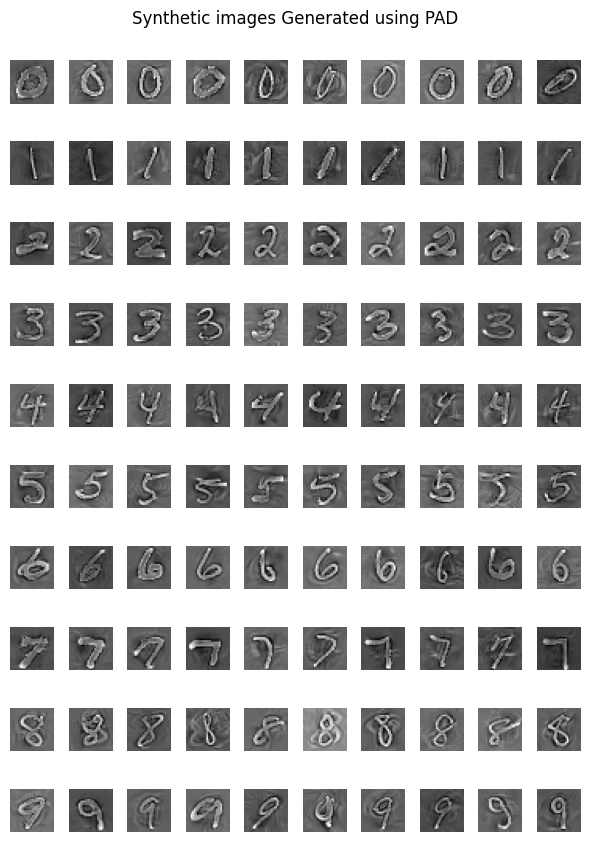

In [43]:
fig, axes = plt.subplots(10, 10, figsize=(6, 1.5*5))
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i].cpu().numpy().squeeze(), cmap="gray")
    ax.axis('off')
plt.suptitle("Synthetic images Generated using PAD")
plt.tight_layout()